In [1]:
import matplotlib.pyplot as plt
from pypdb import *
import pandas as pd
from Data_Downloads import give_corrsponding_ids

In [2]:
bmrb_pdb_ids = pd.read_csv("BMRB_PDB_ids.csv",
                            names=["bmrb_ids", "pdb_ids"],
                            encoding='latin-1')
bmrb_pdb_ids.drop_duplicates(subset="bmrb_ids", keep="first", inplace=True, ignore_index=True)


In [3]:
with open("found_bmrb_ids.txt", "r") as infile:
    found_bmrb_ids_strings = infile.read().replace("\n","").split(",")
    found_bmrb_ids = [int(bmrb_id) for bmrb_id in found_bmrb_ids_strings]


In [4]:
pdb_ids = give_corrsponding_ids(bmrb_pdb_ids,found_bmrb_ids)

In [5]:
proteins = []
rna_dna = []
not_found = []

for pdb_id in pdb_ids:
    all_info = get_info(pdb_id)
    if all_info is not None:
        classification = all_info["struct_keywords"]["pdbx_keywords"]
        if classification == "RNA" or classification == "DNA" or classification == "DNA-RNA HYBRID" or "/DNA" in classification or "/RNA" in classification:
            rna_dna.append(pdb_id)
        else:
            proteins.append(pdb_id)
    else: 
        not_found.append(pdb_id)

/Users/rantanplan/anaconda3/envs/NMR/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/Users/rantanplan/anaconda3/envs/NMR/lib/python3.10/site-packages/pypdb/pypdb.py:466: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


___

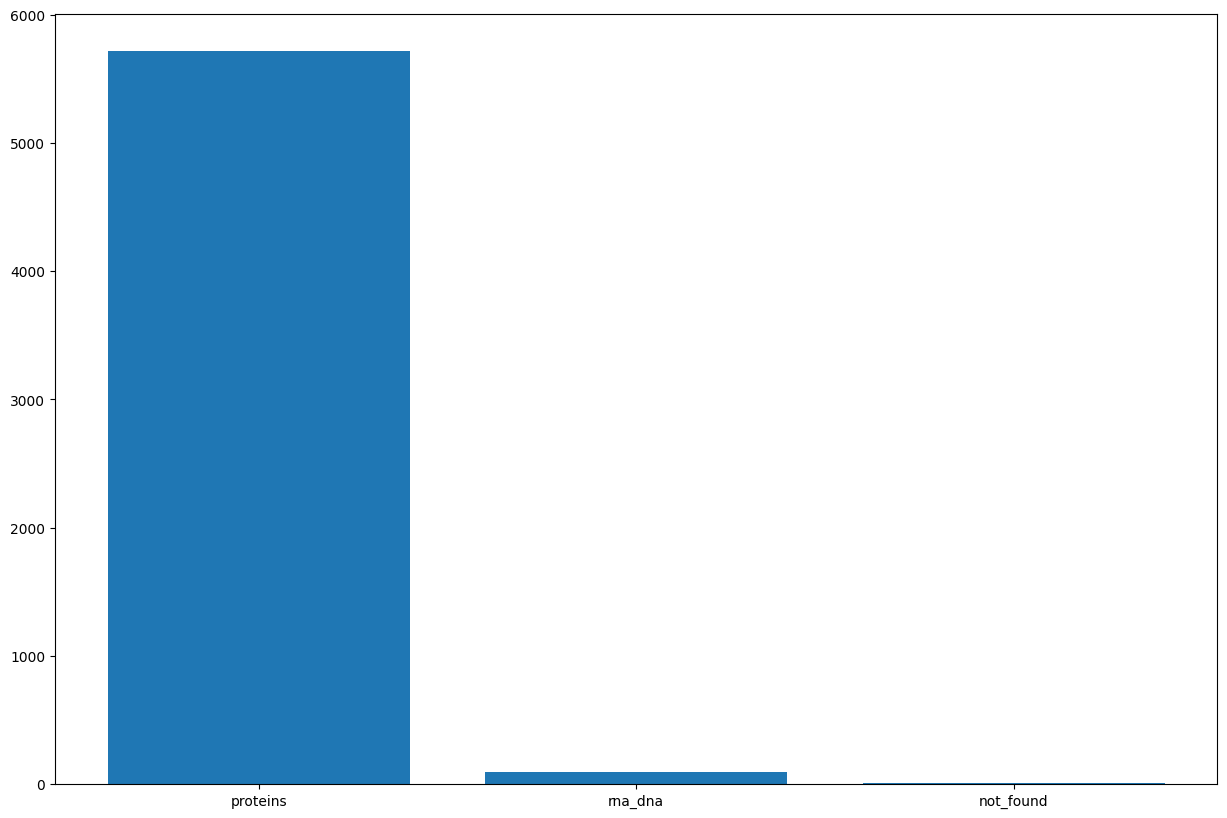

In [6]:
plt.figure(figsize=(15, 10))
plt.bar(["proteins", "rna_dna", "not_found"],[len(proteins), len(rna_dna), len(not_found)])
plt.show()

In [7]:
for category, number in zip(["proteins", "rna_dna", "not_found"],[proteins, rna_dna, not_found]):
    print(category, ":", len(number))

proteins : 5719
rna_dna : 92
not_found : 8


---

In [8]:
len(proteins)

5719

In [9]:
proteins[:10]

['1E8P',
 '1Q2N',
 '1JOO',
 '1JOQ',
 '2DEF',
 '2EZH',
 '1A5J',
 '1Q80',
 '1H95',
 '1RXR']

In [10]:
rna_dna[:10]

['1NK2',
 '2LEF',
 '1KQQ',
 '1F6U',
 '1EKZ',
 '1KOS',
 '1L1M',
 '1IV6',
 '1LO1',
 '1C9S']

In [11]:
not_found[:10]

['1JJL', '2LPY', '2M95', '5FIM', '6TK0', '6Y0I', '8BDV', '8EPT']

## Filtering

In [12]:
protein_bmrb_ids = give_corrsponding_ids(bmrb_pdb_ids, query_ids=proteins, ref_ids="pdb_ids", target_ids="bmrb_ids")

In [13]:
len(protein_bmrb_ids)

5729

two pdb entries can have two bmrb entries. This isn't a problem since I have two different spctra for the two different bmrb entries, but the same pdb entry.

In [14]:
len(bmrb_pdb_ids.pdb_ids)

7903

In [15]:
len(set(bmrb_pdb_ids.pdb_ids))

7810

---

In [16]:
with open("Thesis_filtered_by_protein.txt", "w") as outfile:
    outfile.writelines(",".join(map(str, protein_bmrb_ids)))